<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week5/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

#concatenate axis =1 : 열방향(좌->우)으로 배열 합치기

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [ ]:
np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [ ]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.45998036, 0.83883052,
       0.02026337])

In [ ]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6198 - accuracy: 0.8102 - val_loss: 0.3038 - val_accuracy: 0.9052
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.9207 - val_loss: 0.2204 - val_accuracy: 0.9319
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1699 - accuracy: 0.9469 - val_loss: 0.1534 - val_accuracy: 0.9548
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1216 - accuracy: 0.9619 - val_loss: 0.1507 - val_accuracy: 0.9548
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0877 - accuracy: 0.9726 - val_loss: 0.1546 - val_accuracy: 0.9540
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9788 - val_loss: 0.1371 - val_accuracy: 0.9586
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.1386 - val_accuracy: 0.9591
Epoch 

**Plotting a validation accuracy comparison**

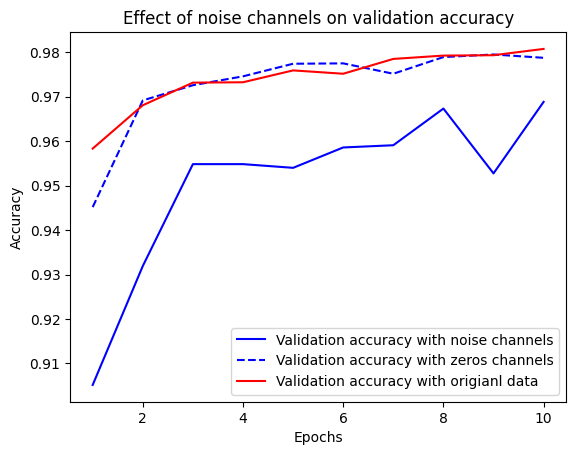

In [7]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, 'r',
         label = 'Validation accuracy with origianl data')
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

noisy information을 딥러닝 모델에 넣었을 때 퍼포먼스 하락
feature engineering을 통해 퍼포먼스 향상 가능할 수 있다

딥러닝에서 feature engineering이 필요하지 않다? 일부는 맞는 얘기

딥러닝에서는 모델이 중요한 feature를 스스로 learn, train 가능
하지만 feature engineering을 올바른 방식으로 한다면 더 나은 퍼포먼스를 얻을 수 있음

noisy dataset을 제거하는 게 딥러닝에서 여전히 중요

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3155 - accuracy: 0.1029 - val_loss: 2.3044 - val_accuracy: 0.1092
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2993 - accuracy: 0.1149 - val_loss: 2.3097 - val_accuracy: 0.1065
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2913 - accuracy: 0.1273 - val_loss: 2.3146 - val_accuracy: 0.1063
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2799 - accuracy: 0.1375 - val_loss: 2.3242 - val_accuracy: 0.1032
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2653 - accuracy: 0.1516 - val_loss: 2.3297 - val_accuracy: 0.1026
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2457 - accuracy: 0.1664 - val_loss: 2.3402 - val_accuracy: 0.1029
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2229 - accuracy: 0.1794 - val_loss: 2.3526 - val_accuracy: 0.1035

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

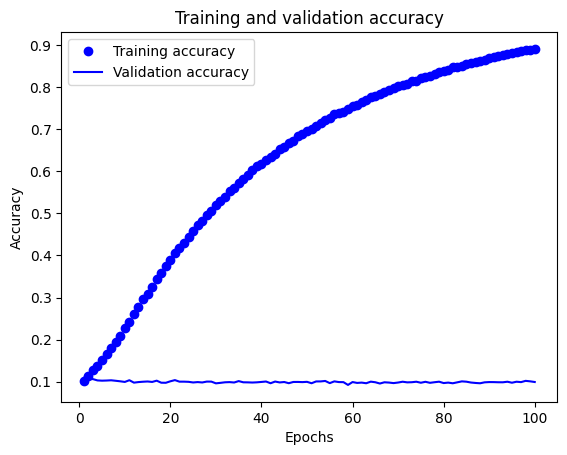

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

라벨을 셔플 했음

0~9까지의 라벨을 분류하는 모델이니까 처음 train_accuracy는 0.1 정도

딥러닝에서 어떤 dataset으로도 train 하면 train_accuracy는 always 증가
하지만 val_accuracy를 보고 generalization power를 확인해야함

위의 사례에선 train_accuracy가 0.9정도로 높지만 val_accuracy는 0.1
generalization이 잘 이루어지지 않음

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [13]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3284 - accuracy: 0.1035 - val_loss: 2.3171 - val_accuracy: 0.1013
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3120 - accuracy: 0.1105 - val_loss: 2.3165 - val_accuracy: 0.1047
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3059 - accuracy: 0.1164 - val_loss: 2.3236 - val_accuracy: 0.1011
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3020 - accuracy: 0.1176 - val_loss: 2.3204 - val_accuracy: 0.1054
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2989 - accuracy: 0.1209 - val_loss: 2.3255 - val_accuracy: 0.0996
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2966 - accuracy: 0.1237 - val_loss: 2.3200 - val_accuracy: 0.1042
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2943 - accuracy: 0.1270 - val_loss: 2.3233 - val_accuracy: 0.1028
Epoch 

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 2.3058 - accuracy: 0.1031 - val_loss: 2.3021 - val_accuracy: 0.1123
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1109 - val_loss: 2.3025 - val_accuracy: 0.1107
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2989 - accuracy: 0.1141 - val_loss: 2.3044 - val_accuracy: 0.1097
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2957 - accuracy: 0.1202 - val_loss: 2.3058 - val_accuracy: 0.1095
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 2.2908 - accuracy: 0.1267 - val_loss: 2.3089 - val_accuracy: 0.1086
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2841 - accuracy: 0.1304 - val_loss: 2.3153 - val_accuracy: 0.1014
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2767 - accuracy: 0.1371 - val_loss: 2.3181 - val_accuracy: 0.1056
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 74ms/step - loss: 0.5510 - accuracy: 0.7799 - val_loss: 0.4255 - val_accuracy: 0.8554
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3473 - accuracy: 0.8888 - val_loss: 0.3506 - val_accuracy: 0.8605
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2608 - accuracy: 0.9122 - val_loss: 0.2865 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2100 - accuracy: 0.9281 - val_loss: 0.2790 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1756 - accuracy: 0.9403 - val_loss: 0.2745 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1497 - accuracy: 0.9520 - val_loss: 0.3087 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1292 - accurac

**Version of the model with lower capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5929 - accuracy: 0.7375 - val_loss: 0.5043 - val_accuracy: 0.7972
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4299 - accuracy: 0.8745 - val_loss: 0.4003 - val_accuracy: 0.8694
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3379 - accuracy: 0.8993 - val_loss: 0.3411 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2788 - accuracy: 0.9157 - val_loss: 0.3087 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2381 - accuracy: 0.9259 - val_loss: 0.2985 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2073 - accuracy: 0.9356 - val_loss: 0.2881 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1841 - accuracy: 0.9421 - val_loss: 0.2750 - val_accuracy: 0.8898
Epoch 8/20
30

**Version of the model with higher capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5760 - accuracy: 0.7288 - val_loss: 0.4992 - val_accuracy: 0.7462
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3168 - accuracy: 0.8711 - val_loss: 0.2816 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2669 - accuracy: 0.8941 - val_loss: 0.2829 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1917 - accuracy: 0.9272 - val_loss: 0.2830 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1453 - accuracy: 0.9449 - val_loss: 0.2904 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1101 - accuracy: 0.9621 - val_loss: 0.4762 - val_accuracy: 0.8449
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1074 - accuracy: 0.9582 - val_loss: 0.3294 - val_accuracy: 0.8831
Epoch 8/20
30

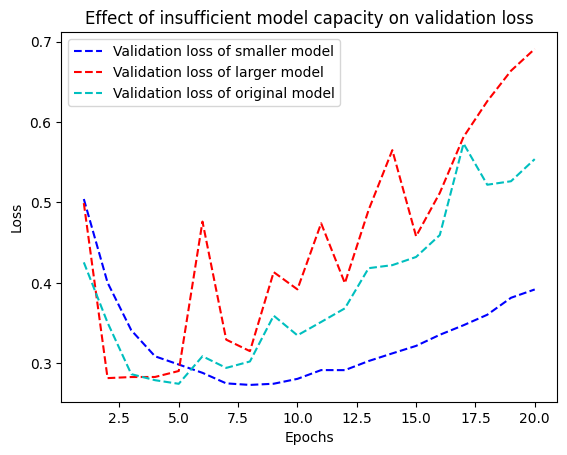

In [21]:
import matplotlib.pyplot as plt
val_loss_small_model = history_smaller_model.history["val_loss"]
val_loss_large_model = history_larger_model.history['val_loss']
val_loss_original_model = history_original.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_small_model, "b--",
         label="Validation loss of smaller model")
plt.plot(epochs, val_loss_large_model, "r--",
         label="Validation loss of larger model")
plt.plot(epochs, val_loss_original_model, "c--",
         label="Validation loss of original model")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 122ms/step - loss: 0.6570 - accuracy: 0.6065 - val_loss: 0.6051 - val_accuracy: 0.7978
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5794 - accuracy: 0.7689 - val_loss: 0.5333 - val_accuracy: 0.8573
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5129 - accuracy: 0.8191 - val_loss: 0.4574 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4536 - accuracy: 0.8534 - val_loss: 0.4170 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4064 - accuracy: 0.8743 - val_loss: 0.3793 - val_accuracy: 0.8736
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3616 - accuracy: 0.8943 - val_loss: 0.3425 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3248 - accuracy: 0.9099 - val_loss: 0.3310 - val_accuracy: 0.8885
Epoch 8/20
3

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    
    layers.Dense(16, activation="relu"),
    
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 63ms/step - loss: 0.5567 - accuracy: 0.7657 - val_loss: 0.4408 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3620 - accuracy: 0.8895 - val_loss: 0.3389 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2702 - accuracy: 0.9128 - val_loss: 0.2933 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2151 - accuracy: 0.9325 - val_loss: 0.3024 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1809 - accuracy: 0.9435 - val_loss: 0.3002 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1562 - accuracy: 0.9509 - val_loss: 0.2905 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1324 - accuracy: 0.9597 - val_loss: 0.2906 - val_accuracy: 0.8869
Epoch 8/20
30

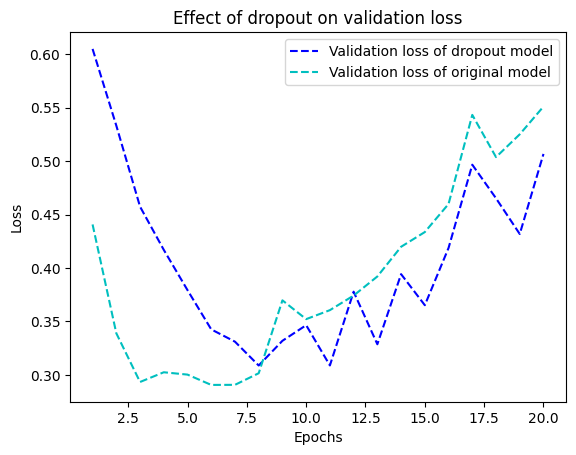

In [25]:
import matplotlib.pyplot as plt
val_loss_dropout_model = history_dropout.history["val_loss"]
val_loss_original_model = history_original.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout_model, "b--",
         label="Validation loss of dropout model")
plt.plot(epochs, val_loss_original_model, "c--",
         label="Validation loss of original model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

accuracy도 중요.

이 그래프가 시사하는 바는 드롭아웃의 효과. 과적합의 지연?

## Summary